In [60]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import csv
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
cwd = os.getcwd()

In [4]:
start_date = [
    "2022-09-21", "2022-07-27", "2022-06-15", "2022-05-04", "2022-03-16", 
    "2018-12-19", "2018-09-26", "2018-06-13", "2018-03-21",
    "2017-12-13", "2017-06-14", "2017-03-15", "2016-12-14", "2015-12-16", "2006-06-29", "2006-05-10",
    "2006-03-28", "2006-01-31", "2005-12-13","2005-11-01", "2005-09-01","2005-09-20","2005-08-09","2005-06-30",
    "2005-05-03", "2005-03-22", "2005-02-02","2004-12-14","2004-11-10","2004-09-21","2004-08-10","2004-06-30",
    "2000-05-16","2000-03-21", "2000-02-02"
    ]
end_date = []

for i in range(len(start_date)): ## Generate End dates for each FOMC meeting term
    start_date[i] = datetime.strptime(start_date[i], "%Y-%m-%d") - timedelta(days = 1)
    end_date.append(start_date[i] + timedelta(days = 55))
    start_date[i] = datetime.strftime(start_date[i], "%Y-%m-%d") 
    end_date[i] = datetime.strftime(end_date[i], "%Y-%m-%d") # end_date and start_date as strings


In [5]:
def initTicker(stock):
    ticker = stock
    dir = cwd + "\\Data\\TransformedData\\{}.csv".format(ticker)
    df = pd.read_csv(dir)
    termInfo = pd.read_csv("TermInformation.csv")
    termInfo = termInfo.set_index('Unnamed: 0')
    termInfo.index.name = "Ticker"
    df.index.name = "Date"
    return df, termInfo

In [6]:
def getRecDays(termInfo, ticker):
    recDay1 = termInfo.loc[ticker][0]
    recDay2 = termInfo.loc[ticker][1]
    term = termInfo.loc[ticker][2]
    return recDay1, recDay2, term

In [55]:
def backtest(df, recDay1, recDay2, term):
    init = 1
    win = 0
    lose = 0
    for i in range(len(df)):
        vect = df.loc[len(df) - i - 1]
        vect = vect.drop('id')
        recDay1 = np.floor(recDay1).astype(int)
        recDay2 = np.floor(recDay2).astype(int)
        term = np.round(term).astype(int)
        buyPrice = 0.0
        sellPrice = 0.0
        if vect[recDay1] < vect[0]:
            buyPrice = vect[recDay1]
        else:
            print("{}th FOMC Return : 1.00".format(i))
            print("Cumulative Return : {}".format(init))
            continue
        for day in range(recDay1, min(recDay1 + term + 1, 31)):
            if vect[day] < 0.95 * buyPrice:
                sellPrice = vect[day]
                init = init * sellPrice / buyPrice
                lose = lose + 1
                break
        if sellPrice != 0:
            print("{}th FOMC : Buy {} Sell {} Return {}".format(i, buyPrice, sellPrice, sellPrice / buyPrice))
            print("Cumulative Return : {}".format(init))
            continue
        sellPrice = vect[recDay1 + term]
        init = init * sellPrice / buyPrice
        print("{}th FOMC : Buy {} Sell {} Return {}".format(i, buyPrice, sellPrice, sellPrice / buyPrice))
        print("Cumulative Return : {}".format(init))
        if(sellPrice > buyPrice):
            win = win + 1
    print(win, lose)
    return init, win, lose

def backtestSup(df, recDay1, recDay2, term):
    init = 1
    win = 0
    lose = 0
    for i in range(len(df)):
        vect = df.loc[len(df) - i - 1]
        vect = vect.drop('id')
        recDay1 = np.floor(recDay1).astype(int)
        recDay2 = np.floor(recDay2).astype(int)
        term = np.round(term).astype(int)
        buyPrice = 0.0
        sellPrice = 0.0
        if vect[recDay1] < vect[0]:
            buyPrice = vect[recDay1]
        else:
            continue
        for day in range(recDay1, min(recDay1 + term + 1, 31)):
            if vect[day] < 0.95 * buyPrice:
                sellPrice = vect[day]
                init = init * sellPrice / buyPrice
                lose = lose + 1
                break
        if sellPrice != 0:
            continue
        sellPrice = vect[recDay1 + term]
        init = init * sellPrice / buyPrice
        if(sellPrice > buyPrice):
            win = win + 1
    return init, win, lose

def backtestFuture(df, recDay1, recDay2, term):
    init = 1
    win = 0
    lose = 0
    for i in range(31, len(df)):
        vect = df.loc[len(df) - i - 1]
        vect = vect.drop('id')
        recDay1 = np.floor(recDay1).astype(int)
        recDay2 = np.floor(recDay2).astype(int)
        term = np.round(term).astype(int)
        buyPrice = 0.0
        sellPrice = 0.0
        if vect[recDay1] < vect[0]:
            buyPrice = vect[recDay1]
        else:
            continue
        for day in range(recDay1, min(recDay1 + term + 1, 31)):
            if vect[day] < 0.95 * buyPrice:
                sellPrice = vect[day]
                init = init * sellPrice / buyPrice
                lose = lose + 1
                break
        if sellPrice != 0:
            continue
        sellPrice = vect[recDay1 + term]
        init = init * sellPrice / buyPrice
        if(sellPrice > buyPrice):
            win = win + 1
    return init, win, lose

In [8]:
def pipeline(stock):
    df, termInfo = initTicker(stock)
    recDay1, recDay2, term = getRecDays(termInfo, stock)
    return backtest(df, recDay1, recDay2, term)

In [31]:
cluster2 = ['ABBV', 'AXP', 'BALL', 'BDX', 'BSX', 'CARR', 'CDAY', 'CF', 'CTLT',
       'DAL', 'DOW', 'FTV', 'GM', 'HCA', 'HLT', 'HPE', 'HWM', 'JCI', 'LDOS',
       'LNC', 'LYB', 'MA', 'MGM', 'OTIS', 'SYF', 'TDG', 'TEL', 'TFX', 'TMO',
       'TPR', 'URI', 'WM', 'WRK', 'XYL', 'ZTS']
cluster1 = ['AAP', 'ABC', 'ACN', 'ADM', 'ALL', 'APTV', 'BA', 'BBY', 'CAH', 'CBRE',
       'CHD', 'CMA', 'CMI', 'COF', 'COP', 'CRM', 'CTVA', 'CVS', 'DG', 'DGX',
       'DVA', 'EQR', 'ETN', 'EW', 'EXR', 'FDX', 'FLT', 'GLW', 'GNRC', 'GS',
       'HAL', 'HIG', 'HPQ', 'IR', 'KEY', 'KEYS', 'KMX', 'KR', 'LIN', 'LVS',
       'LYV', 'MLM', 'MPC', 'MRO', 'MSCI', 'MSI', 'NUE', 'OGN', 'PM', 'PPG',
       'PRU', 'PSX', 'PXD', 'ROK', 'SCHW', 'SHW', 'SJM', 'SPG', 'TDY', 'TWTR',
       'TYL', 'UDR', 'UPS', 'VFC', 'VICI', 'VLO', 'VNO', 'WFC']

In [47]:
def initTickerCluster(stock, retroactive):
    ticker = stock
    retro = ""
    if retroactive:
        retro = "Retroactive"
    dir = cwd + "\\Data\\TransformedData\\{}.csv".format(ticker)
    df = pd.read_csv(dir)
    termInfo = pd.read_csv("TermInformation{}.csv".format(retro))
    termInfo = termInfo.set_index('Unnamed: 0')
    termInfo.index.name = "Ticker"
    df.index.name = "Date"
    return df, termInfo

def getRecDaysCluster(cluster, retroactive):
    retro = ""
    if retroactive:
        retro = "Retroactive"
    termInfo = pd.read_csv("TermInformation{}.csv".format(retro))
    termInfo = termInfo.set_index('Unnamed: 0')
    termInfo.index.name = "Ticker"
    vect = termInfo.loc[cluster].median(axis = 0)
    recDay1 = vect[0]
    recDay2 = vect[1]
    term = vect[2]
    return recDay1, recDay2, term

def pipelineCluster(cluster):
    score = 0
    recDay1, recDay2, term = getRecDaysCluster(cluster)
    win = 0
    loss = 0
    totWin = 0
    totLoss = 0
    for stock in cluster:
        df, termInfo = initTickerCluster(stock)
        val, partWin, partLoss = backtestSup(df, recDay1, recDay2, term)
        totWin += partWin
        totLoss += partLoss
        if(val > 1):
            win += 1
        else:
            loss += 1
        score = score + val
    print("Wins : {} Loss : {}".format(win, loss))
    print("Partial Wins : {} Partial Loss : {}".format(totWin, totLoss))
    return score / len(cluster)

def pipelineIndividual(cluster):
    score = 0
    win = 0
    loss = 0
    totWin = 0
    totLoss = 0
    for stock in cluster:
        df, termInfo = initTicker(stock)
        recDay1, recDay2, term = getRecDays(termInfo, stock)
        val, partWin, partLoss = backtestSup(df, recDay1, recDay2, term)
        totWin += partWin
        totLoss += partLoss
        if(val > 1):
            win += 1
        else:
            loss += 1
        score = score + val
    print("Wins : {} Loss : {}".format(win, loss))
    print("Partial Wins : {} Partial Loss : {}".format(totWin, totLoss))
    return score / len(cluster)

Retroactive simulation.

In [48]:
print("Total return on Cluster-heavy strategy : {}".format(pipelineCluster(cluster1)))
print("Total return on naive strategy : {}".format(pipelineIndividual(cluster1)))

Wins : 45 Loss : 23
Partial Wins : 449 Partial Loss : 268
Total return on Cluster-heavy strategy : 1.1259868446515509
Wins : 42 Loss : 26
Partial Wins : 461 Partial Loss : 264
Total return on naive strategy : 1.1351809504777461


In [50]:
print("Total return on Cluster-heavy strategy : {}".format(pipelineCluster(cluster2)))
print("Total return on naive strategy : {}".format(pipelineIndividual(cluster2)))

Wins : 28 Loss : 7
Partial Wins : 191 Partial Loss : 89
Total return on Cluster-heavy strategy : 1.141435748351403
Wins : 23 Loss : 12
Partial Wins : 193 Partial Loss : 88
Total return on naive strategy : 1.1350880436891808


Train - Test Simulation.

In [52]:
def pipelineClusterFuture(cluster):
    score = 0
    recDay1, recDay2, term = getRecDaysCluster(cluster)
    win = 0
    loss = 0
    totWin = 0
    totLoss = 0
    for stock in cluster:
        df, termInfo = initTickerCluster(stock)
        val, partWin, partLoss = backtestFuture(df, recDay1, recDay2, term)
        totWin += partWin
        totLoss += partLoss
        if(val > 1):
            win += 1
        else:
            loss += 1
        score = score + val
    print("Wins : {} Loss : {}".format(win, loss))
    print("Partial Wins : {} Partial Loss : {}".format(totWin, totLoss))
    return score / len(cluster)

def pipelineIndividualFuture(cluster):
    score = 0
    win = 0
    loss = 0
    totWin = 0
    totLoss = 0
    for stock in cluster:
        df, termInfo = initTicker(stock)
        recDay1, recDay2, term = getRecDays(termInfo, stock)
        val, partWin, partLoss = backtestFuture(df, recDay1, recDay2, term)
        totWin += partWin
        totLoss += partLoss
        if(val > 1):
            win += 1
        else:
            loss += 1
        score = score + val
    print("Wins : {} Loss : {}".format(win, loss))
    print("Partial Wins : {} Partial Loss : {}".format(totWin, totLoss))
    return score / len(cluster)

In [66]:
import DataCluster

[0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0]
           0       1
A      6.350  21.250
AAP   11.550  19.875
ABBV  12.175  23.375
ABC   10.800  21.750
ABT   12.000  13.625
...      ...     ...
XOM    9.350  21.375
XYL   10.125  23.875
YUM   11.500  17.250
ZBH   13.550  23.125
ZTS   12.475  22.750

[353 rows x 2 columns]
Index(['AAP', 'ABBV', 'ABC', 'ACN', 'ADM', 'AFL', 'AIG', 'AJG', 'ALB', 'ALK',
       ...
       'WM', 'WMB', 'WRK', 'WST', 'WY', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZTS'],
      dtype='object', length=237)
Index([], dtype='object')
[-1  0  0  0 -1  0  0 -1 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0 -1 -1  0  0 -1  0  0  0  0 -1  0  0  0  0  0 -1 -1  0  0
 -1  0  0  0  0 -1 -1  0  0 -1 -1  0 -1  0  0  0  0  0  0 -1 -1 -1  0  0
  0 -1  0  0  0  0  0  0 -1 -1  0  0 -1  0  0  0 -1  0 -1  0  0  0  0 -1
  0  0 -1  0  0  0 -1 -1 -1  0  0  0 -1 -1  0 -1 -1  0 -1  0 -1 -1  0  0
 -1  0  0 -1  0  0  0 -1  0 -1  0  0 -1 -1  0  0  0 -1  0 -1 -1 -1  0  0
  0

KeyError: 0

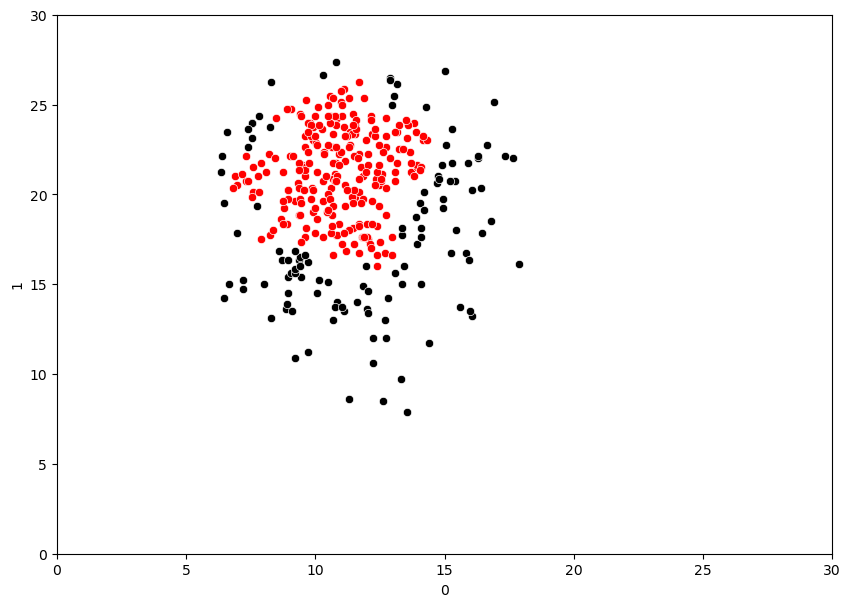

In [67]:
new_cluster = DataCluster.main()
print(new_cluster)
print("Total return on Cluster-heavy strategy : {}".format(pipelineClusterFuture(new_cluster)))
print("Total return on naive strategy : {}".format(pipelineIndividualFuture(new_cluster)))

Wins = If we profit from the trade, we win. \
Loss = If we lose from the trade, we lose. \
Return = Amount of money at the end if we start with 1$.